<a href="https://colab.research.google.com/github/joshuamach632-hub/TB-model/blob/main/TB_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)
import tensorflow as tf
tf.random.set_seed(0)

Mounted at /content/drive


Importing dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as PLT
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Data Curation

Upload kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
#setup Kaggle API key as environment variables
os.environ['KAGGLE USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE KEY'] = kaggle_credentials["key"]

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/tuberculosis-tb-chest-xray-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tuberculosis-tb-chest-xray-dataset


In [ ]:
!cp -r /kaggle/input/tuberculosis-tb-chest-xray-dataset /content/

In [ ]:
!ls /content/tuberculosis-tb-chest-xray-dataset

TB_Chest_Radiography_Database


In [ ]:
print(os.listdir("/content/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal"))

['Normal-1956.png', 'Normal-2875.png', 'Normal-2950.png', 'Normal-3054.png', 'Normal-1848.png', 'Normal-2312.png', 'Normal-1998.png', 'Normal-2110.png', 'Normal-475.png', 'Normal-1430.png', 'Normal-1794.png', 'Normal-2937.png', 'Normal-530.png', 'Normal-1715.png', 'Normal-937.png', 'Normal-231.png', 'Normal-429.png', 'Normal-1003.png', 'Normal-720.png', 'Normal-2665.png', 'Normal-1187.png', 'Normal-2196.png', 'Normal-3454.png', 'Normal-415.png', 'Normal-1788.png', 'Normal-2075.png', 'Normal-285.png', 'Normal-1322.png', 'Normal-1773.png', 'Normal-3353.png', 'Normal-3327.png', 'Normal-3135.png', 'Normal-2920.png', 'Normal-2138.png', 'Normal-3130.png', 'Normal-1617.png', 'Normal-1618.png', 'Normal-500.png', 'Normal-3257.png', 'Normal-2976.png', 'Normal-1922.png', 'Normal-814.png', 'Normal-2197.png', 'Normal-865.png', 'Normal-2623.png', 'Normal-3347.png', 'Normal-2108.png', 'Normal-265.png', 'Normal-543.png', 'Normal-233.png', 'Normal-3323.png', 'Normal-179.png', 'Normal-1378.png', 'Normal

In [ ]:
print(len(os.listdir("/content/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal")))

3500


In [ ]:
print(len(os.listdir("/content/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis")))
print(os.listdir("/content/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis")[:5])

700
['Tuberculosis-397.png', 'Tuberculosis-313.png', 'Tuberculosis-588.png', 'Tuberculosis-269.png', 'Tuberculosis-138.png']


In [ ]:
print(os.listdir("/content/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis"))

['Tuberculosis-397.png', 'Tuberculosis-313.png', 'Tuberculosis-588.png', 'Tuberculosis-269.png', 'Tuberculosis-138.png', 'Tuberculosis-459.png', 'Tuberculosis-87.png', 'Tuberculosis-427.png', 'Tuberculosis-537.png', 'Tuberculosis-608.png', 'Tuberculosis-22.png', 'Tuberculosis-600.png', 'Tuberculosis-64.png', 'Tuberculosis-50.png', 'Tuberculosis-169.png', 'Tuberculosis-120.png', 'Tuberculosis-309.png', 'Tuberculosis-426.png', 'Tuberculosis-627.png', 'Tuberculosis-654.png', 'Tuberculosis-209.png', 'Tuberculosis-388.png', 'Tuberculosis-291.png', 'Tuberculosis-354.png', 'Tuberculosis-62.png', 'Tuberculosis-409.png', 'Tuberculosis-398.png', 'Tuberculosis-517.png', 'Tuberculosis-311.png', 'Tuberculosis-447.png', 'Tuberculosis-359.png', 'Tuberculosis-314.png', 'Tuberculosis-672.png', 'Tuberculosis-196.png', 'Tuberculosis-598.png', 'Tuberculosis-647.png', 'Tuberculosis-300.png', 'Tuberculosis-487.png', 'Tuberculosis-45.png', 'Tuberculosis-148.png', 'Tuberculosis-642.png', 'Tuberculosis-19.png'

Data preprocessing

In [ ]:
#Data set path
base_dir="/content/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"

(512, 512, 3)


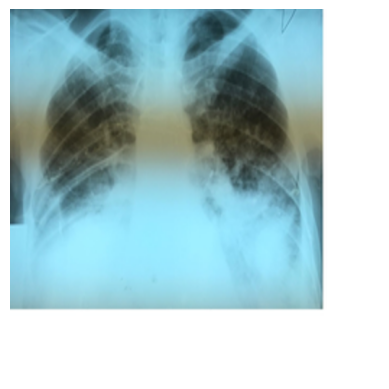

(512, 512, 3)


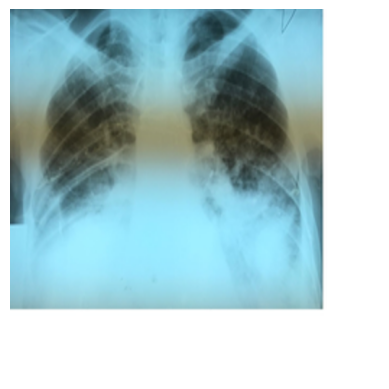

In [ ]:
image_path="/content/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-590.png"

#read the image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img= mpimg.imread(image_path)

print (img.shape)

#Display image

plt.imshow(img)
plt.axis('off')
plt.show()

img= mpimg.imread(image_path)

print (img.shape)

#Display image

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#Image parameters

img_size = 224
batch_size = 32

Train Test split

In [ ]:
#image Data Generators
data_gen = ImageDataGenerator(
rescale=1./255,
validation_split=0.1,#image augmentation to help simulate real world variations in CXRs
rotation_range = 10,
width_shift_range = 0.1,
height_shift_range = 0.1,
zoom_range = 0.1,
shear_range = 0.1,
horizontal_flip = True


)

In [ ]:

#Train Generator
train_generator= data_gen.flow_from_directory(
base_dir,
target_size= (img_size,img_size),
batch_size = batch_size,
subset = 'training',
class_mode = 'categorical'
)

Found 3780 images belonging to 2 classes.


In [ ]:

#Validation Generator
validation_generator=data_gen.flow_from_directory(
base_dir,
target_size = (img_size, img_size),
batch_size = batch_size,
subset= 'validation',
class_mode = 'categorical'
)

Found 420 images belonging to 2 classes.


In [ ]:
#Callbacks to prevent over fitting and get best check point
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor= 'val_loss', patience = 3, restore_best_weights = True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/TB_Model/best_model.h5', save_best_only=True)

In [ ]:
#Deal with high class imbalance
from sklearn.utils import class_weight
import numpy as np

# Get the class labels from the generator
class_labels = train_generator.classes  # 0 = NORMAL, 1 = TB ( order of my folders)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)

# Convert to dictionary for Keras
class_weights_dict = dict(enumerate(class_weights))

Convolutional Neural Network

In [ ]:
#Model Definition
model= models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(img_size, img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,795,906 (182.33 MB)

 Trainable params: 47,795,906 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile model
#Compile model
model.compile(optimizer= 'adam',
loss= 'categorical_crossentropy',
metrics=['accuracy'])

Training model

In [ ]:
#Training the model

history=model.fit(
train_generator,
steps_per_epoch= train_generator.samples//
batch_size,epochs= 5,
validation_data= validation_generator,
validation_steps= validation_generator.samples//
batch_size,
callbacks = [early_stop,checkpoint],
class_weight = class_weights_dict

)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.6548 - loss: 2.9722

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 112s 883ms/step - accuracy: 0.6559 - loss: 2.9564 - val_accuracy: 0.6106 - val_loss: 0.7131
Epoch 2/5
  1/118 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.6562 - loss: 0.3887

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


118/118 ━━━━━━━━━━━━━━━━━━━━ 29s 246ms/step - accuracy: 0.6562 - loss: 0.3887 - val_accuracy: 0.8462 - val_loss: 0.3390
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 98s 796ms/step - accuracy: 0.8888 - loss: 0.3040 - val_accuracy: 0.8510 - val_loss: 0.3415
Epoch 4/5
  1/118 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8125 - loss: 0.3742

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - accuracy: 0.8125 - loss: 0.3742 - val_accuracy: 0.8582 - val_loss: 0.3332
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - accuracy: 0.8996 - loss: 0.2643

118/118 ━━━━━━━━━━━━━━━━━━━━ 98s 830ms/step - accuracy: 0.8997 - loss: 0.2641 - val_accuracy: 0.9543 - val_loss: 0.1416


In [ ]:
# Create the folder path
save_path = '/content/drive/MyDrive/TB_Model'

# Make sure the folder exists
import os
os.makedirs(save_path, exist_ok=True)

# Save the model
model.save(f'{save_path}/tb_cnn_model.h5')

In [ ]:
#Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples//batch_size)
print(f"Validation Accuracy:{val_accuracy * 100 :.2f}%")

Evaluating model...
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 654ms/step - accuracy: 0.9512 - loss: 0.1467
Validation Accuracy:95.91%


In [ ]:
#plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc= 'upper left')
plt.show()




#plot training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc= 'upper left')
plt.show()

Building a predictive model

In [ ]:
#function to load and preprocess image using pillow

def load_and_preprocess_image(image_path, target_size=(224, 224)):

  #load image
  from PIL import Image
  img= Image.open(image_path)

  #Convert to RGB using PIL
  img = Image.open(image_path).convert('RGB')

  #Resize image
  img= img.resize(target_size)

  #Convert image into numpy array

  img_array= np.array(img)

  #add batch dimension
  img_array= np.expand_dims(img_array, axis=0)

  #scale image values to 0,1

  img_array= img_array.astype('float32')/255.
  return img_array

In [ ]:
#function to predict class of an image

def predict_image_class(model, image_path, class_indices):

 preprocessed_img = load_and_preprocess_image(image_path)
 predictions = model.predict(preprocessed_img)
 predicted_class_index= np.argmax(predictions, axis=1) [0]
 predicted_class_name = class_indices[predicted_class_index]
 return predicted_class_name

In [ ]:
#creating a napping from class indices to class names
class_indices={v:k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

In [ ]:
#saving the class names as a json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
#Example
#image_path="/content/76052f7902246ff862f52f5d3cd9cd_big_gallery.jpg"
#image_path="/content/pulmonary-tuberculosis-29.jpg"
#image_path="/content/pulmonary-tuberculosis-67.png"
image_path="/content/Tuberculosis-695.png"

predicted_class_name = predict_image_class(model, image_path,class_indices)

#output the result

print( "X-ray detected:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
X-ray detected: Tuberculosis
